<a href="https://colab.research.google.com/github/arsh919293/arsh919293/blob/main/HandWritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Math Equation Solver**

### **Lambton College**




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import cv2

from PIL import Image
from os import listdir
from os.path import isfile, join
import urllib.request

from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.layers import Dropout

from sklearn.model_selection import train_test_split

# Configuration

In [ ]:
# Seed for reproducibility
np.random.seed(9000)

# Constants
DATA_URL = 'https://adv-python-data.s3.sa-east-1.amazonaws.com/train_final.csv.zip'
OPERATIONS_IMAGES = 'https://adv-python-data.s3.sa-east-1.amazonaws.com/operations.zip'

# Collect Data

In [ ]:
def unzip_file(url:str, zip_name:str,):
  urllib.request.urlretrieve(url, zip_name)
  zip_file = zipfile.ZipFile(zip_name)
  zip_file.extractall('.')

def read_zip_csv_from_url(url:str, zip_name:str, csv_name:str, encoding=None):
  urllib.request.urlretrieve(url, zip_name)
  zip_file = zipfile.ZipFile(zip_name)
  return pd.read_csv(zip_file.open(csv_name), encoding=encoding)

In [ ]:
unzip_file(OPERATIONS_IMAGES, 'operations.zip')

In [ ]:
x_data = read_zip_csv_from_url(DATA_URL, 'train_final.csv.zip', 'train_final.csv')
y_data = x_data[['784']]

In [ ]:
x_data.drop(x_data.columns[[784]],axis=1,inplace=True)
x_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,232,0,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,152,64,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,255,255,255,255,44,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,86,0,0,0,0,0,219,219,219,219,219,219,219,219,219,219,219,219,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_data = np.array(y_data).reshape(len(y_data))
x_data.shape

(47504, 784)

In [ ]:
data_reshaped = []
for i in range(len(x_data)):
    data_reshaped.append(np.array(x_data[i:i+1]).reshape(28,28))

In [ ]:
x_data = np.array(data_reshaped)
x_data.shape

(47504, 28, 28)

In [ ]:
print(y_data.shape)
print(np.unique(y_data))

(47504,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=42)

In [ ]:
print('Size of the training_set: ', X_train.shape)
print('Size of the labels: ', y_train.shape)
print('Size of the test_set: ', X_test.shape)
print('Shape of each image: ', X_train[0].shape)
print('Total number of classes: ', len(np.unique(y_train)))
print('Unique class labels: ', np.unique(y_train))

Size of the training_set:  (31827, 28, 28)
Size of the labels:  (31827,)
Size of the test_set:  (15677, 28, 28)
Shape of each image:  (28, 28)
Total number of classes:  13
Unique class labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


Error: 9



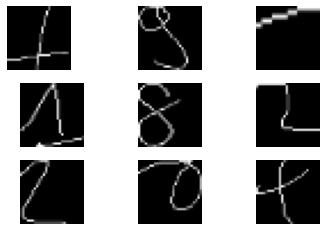

In [ ]:
for i in range(0, 11):
    try:
      plt.subplot(331+i) # plot of 3 rows and 3 columns
      plt.axis('off') # turn off axis
      plt.imshow(X_train[i], cmap='gray') # gray scale
    except:
      print(f'Error: {i}\n')

In [ ]:
# Create train and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

# Hyperparameters configurations

In [ ]:
epochs = 12
batch_size = 128
input_shape = (28,28,1)
optimizer = Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
class ModelEvaluator:
  
  @classmethod
  def loss_and_accuracy(cls, model, X_test, y_test):
    loss, acc = model.evaluate(X_test, y_test)
    print('Test loss:', loss)
    print('Accuracy:', acc)
  
  @classmethod
  def loss_plot(cls, model_history, epochs):
    train_acc = model_history.history['accuracy']
    val_acc = model_history.history['val_accuracy']
    
    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,epochs+1),train_acc, marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1,epochs+1),val_acc, marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = model_history.history['loss']
    val_loss = model_history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,epochs+1),train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1,epochs+1),val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()


# Simple Neural Network

In [ ]:
class SimpleNeuralNetwork:
  def __init__(self, shape, epochs, batch_size):
    self.model = None
    self.history = None
    self.shape = shape
    self.epochs = epochs
    self.batch_size = batch_size

  def compile(self):
    self.model = Sequential()
    self.model.add(Dense(300, input_shape=(784, ), activation='relu'))
    self.model.add(Dense(300, activation='relu'))
    self.model.add(Dense(13, activation='softmax'))
    self.model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    print(self.model.summary())

  def fit(self, X_train, y_train, X_val, y_val):
    history = self.model.fit(X_train, y_train, epochs=self.epochs, batch_size=self.batch_size, validation_data=(X_val, y_val))
    self.history = history    

In [ ]:
X_train_s = X_train.reshape(-1, 784)
X_val_s = X_val.reshape(-1, 784)
X_test_s = X_test.reshape(-1, 784)

print('Training Examples', X_train_s.shape[0])
print('Validation Examples', X_val_s.shape[0])
print('Test Examples', X_test_s.shape[0])

simple_model = SimpleNeuralNetwork(input_shape, epochs, batch_size)
simple_model.compile()
simple_model.fit(X_train_s, y_train, X_val_s, y_val)

Training Examples 29174
Validation Examples 2653
Test Examples 15677
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 13)                3913      
Total params: 329,713
Trainable params: 329,713
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/12
228/228 [==============================] - 20s 13ms/step - loss: 25.1334 - accuracy: 0.3441 - val_loss: 5.5301 - val_accuracy: 0.6709
Epoch 2/12
228/228 [==============================] - 2s 10ms/step - loss: 3.7351 - accuracy: 0.7578 - val_loss: 2.7518 - val_accuracy: 0.8157
Epoch 3/12
228/228

490/490 [==============================] - 1s 2ms/step - loss: 1.0493 - accuracy: 0.9321
Test loss: 1.0493019819259644
Accuracy: 0.9321298599243164


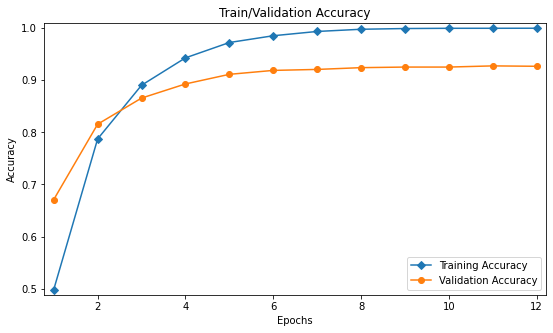

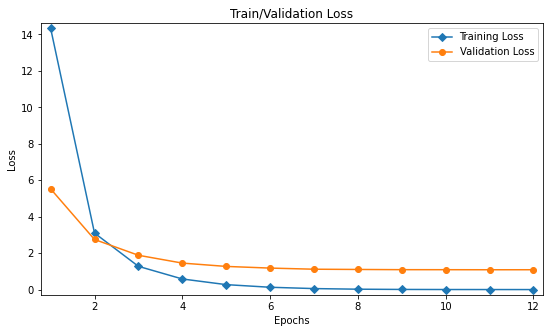

In [ ]:
ModelEvaluator.loss_and_accuracy(simple_model.model, X_test_s, y_test)
ModelEvaluator.loss_plot(simple_model.history, epochs)

# Convolutional model

In [ ]:
# reshape data 
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Train data shape: (29174, 28, 28, 1)
Val data shape: (2653, 28, 28, 1)
Test data shape: (15677, 28, 28, 1)


In [ ]:
class ConvolutioanlModel:
  def __init__(self, shape, epochs, batch_size):
    self.model = None
    self.history = None
    self.shape = shape
    self.epochs = epochs
    self.batch_size = batch_size

  def compile(self):
    self.model = Sequential()
    self.model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
    self.model.add(Flatten())
    self.model.add(Dense(128, activation='relu'))
    self.model.add(Dense(128, activation='softmax'))
    self.model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    print(self.model.summary())

  def fit(self, X_train, y_train, X_val, y_val):
    history = self.model.fit(X_train, y_train, epochs = self.epochs, batch_size=self.batch_size, validation_data=(X_val, y_val))
    self.history = history    

In [ ]:
convolutional_model = ConvolutioanlModel(input_shape, epochs, batch_size)
convolutional_model.compile()
convolutional_model.fit(X_train, y_train, X_val, y_val)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
Total params: 2,785,856
Trainable params: 2,785,856
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/12
228/228 [==============================] - 24s 96ms/step - loss: 2.2327 - accuracy: 0.7382 - val_loss: 0.2087 - val_accuracy: 0.9446
Epoch 2/12
228/228 [==============================] - 23s 99ms/step - loss: 0.0929 - accuracy

490/490 [==============================] - 6s 12ms/step - loss: 0.1183 - accuracy: 0.9786
Test loss: 0.11825770139694214
Accuracy: 0.9785673022270203


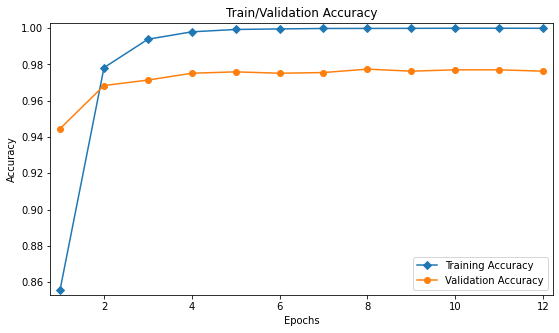

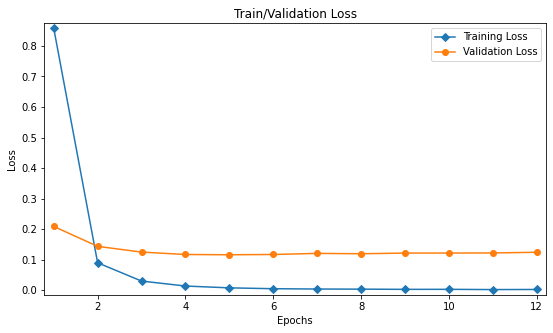

In [ ]:
ModelEvaluator.loss_and_accuracy(convolutional_model.model, X_test, y_test)
ModelEvaluator.loss_plot(convolutional_model.history, epochs)

# Model with MaxPlooting and Dropout

In [ ]:
class ConvolutioanlMaxPlootingModel:
  def __init__(self, shape, epochs, batch_size):
    self.model = None
    self.history = None
    self.shape = shape
    self.epochs = epochs
    self.batch_size = batch_size

  def compile(self):
    self.model = Sequential()
    self.model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
    self.model.add(MaxPool2D(2,2))
    self.model.add(Dropout(0.2))
    self.model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
    self.model.add(MaxPool2D(2,2))
    self.model.add(Dropout(0.2))
    self.model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
    self.model.add(MaxPool2D(2,2))
    self.model.add(Dropout(0.2))
    self.model.add(Flatten())
    self.model.add(Dense(128, activation = 'relu'))
    self.model.add(Dropout(0.2))
    self.model.add(Dense(13, activation = 'softmax'))
    self.model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
    print(self.model.summary())

  def fit(self, X_train, y_train, X_val, y_val):
    history = self.model.fit(X_train, y_train, epochs = self.epochs, batch_size=batch_size,validation_data=(X_val, y_val))
    self.history = history    

In [ ]:
convolutional_maxplooting_model = ConvolutioanlMaxPlootingModel(input_shape, 20, batch_size)
convolutional_maxplooting_model.compile()
convolutional_maxplooting_model.fit(X_train, y_train, X_val, y_val)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)        

490/490 [==============================] - 5s 11ms/step - loss: 0.1704 - accuracy: 0.9527
Test loss: 0.1703917533159256
Accuracy: 0.9526695013046265


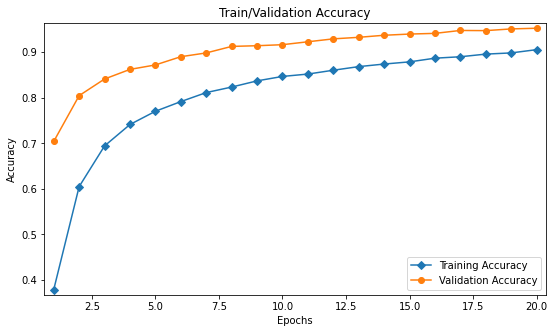

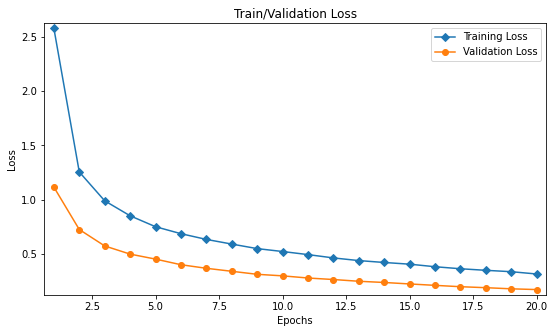

In [ ]:
ModelEvaluator.loss_and_accuracy(convolutional_maxplooting_model.model, X_test, y_test)
ModelEvaluator.loss_plot(convolutional_maxplooting_model.history, 20)

# Testing

In [ ]:
class ImageReader:

  def __show_img(self, img):
      plt.imshow(img, cmap='gray')
      plt.show()

  def read(self, img_path:str):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    self.__show_img(img)
    images = []
    if img is not None:
        img = ~img
        ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        ctrs, ret = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
        w = int(28)
        h = int(28)
        train_data=[]
        rects=[]
        for c in cnt:
            x,y,w,h= cv2.boundingRect(c)
            rect=[x,y,w,h]
            rects.append(rect)
        bool_rect=[]
        for r in rects:
            l=[]
            for rec in rects:
                flag=0
                if rec!=r:
                    if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                        flag=1
                    l.append(flag)
                if rec==r:
                    l.append(0)
            bool_rect.append(l)
        dump_rect=[]
        for i in range(0,len(cnt)):
            for j in range(0,len(cnt)):
                if bool_rect[i][j]==1:
                    area1=rects[i][2]*rects[i][3]
                    area2=rects[j][2]*rects[j][3]
                    if(area1==min(area1,area2)):
                        dump_rect.append(rects[i])
        final_rect=[i for i in rects if i not in dump_rect]
        for r in final_rect:
            x=r[0]
            y=r[1]
            w=r[2]
            h=r[3]
            im_crop =thresh[y:y+h+10,x:x+w+10]
            im_resize = cv2.resize(im_crop,(28,28))
            self.__show_img(im_resize)
            im_resize=np.reshape(im_resize,(28,28,1))
            images.append(im_resize)

    return images

In [ ]:
class EquationSolver:

  def __init__(self, model, input_shape):
    self.model = model
    self.shape = input_shape
  
  def solve(self, images):
    equation = ''
    for i in range(len(images)):
      images[i] = np.array(images[i])
      images[i] = images[i].reshape(self.shape)
      #prediction = self.model.predict_classes(images[i]) # it is the old way - deprecated
      prediction = np.argmax(self.model.predict(images[i]), axis=-1)
      value = self.__get_value(prediction)
      equation = equation + value
    result = self.__solve(equation)
    print(f'\n Equation: {equation} = {result}')

  def __solve(self, equation):
    try:
      return eval(equation)
    except:
      print(f'Error solving the equation: {equation}')
      return None

  def __get_value(self, label):
      if (label[0]==10):
          return '-'
      if (label[0]==11):
          return  '+'
      if (label[0]==12):
          return '*'
      if (label[0]==0):
          return '0'
      if (label[0]==1):
          return '1'
      if (label[0]==2):
          return '2'
      if (label[0]==3):
          return '3'
      if (label[0]==4):
          return '4'
      if (label[0]==5):
          return '5'
      if (label[0]==6):
          return '6'
      if (label[0]==7):
          return '7'
      if (label[0]==8):
          return '8'
      if (label[0]==9):
          return '9'
      return None

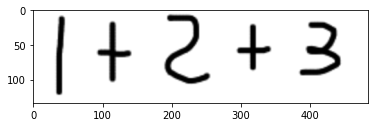

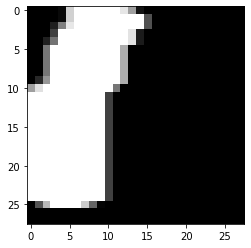

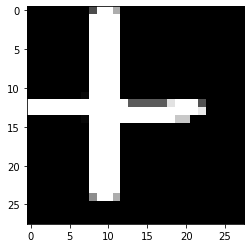

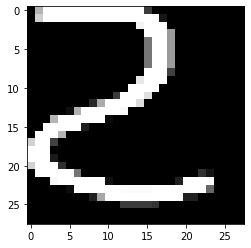

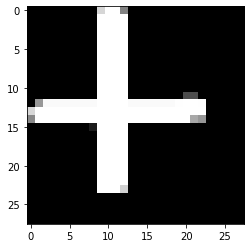

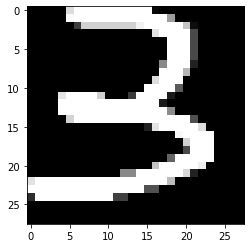

In [ ]:
image_reader = ImageReader()
images = image_reader.read('operation1.png')

In [ ]:
models = [
          {'model': simple_model, 'input_shape': (-1, 784)}
          ,{'model': convolutional_model, 'input_shape': (1,28,28,1)}
          ,{'model': convolutional_maxplooting_model, 'input_shape': (1,28,28,1)}
]

In [ ]:
for obj in models:
  try:
    equation_solver = EquationSolver(obj['model'].model, obj['input_shape'])
    equation_solver.solve(images)
  except:
    print('The equation could not be processed properly')


 Equation: 2+4+5+4 = 15

 Equation: 2+4+5+4 = 15
Error solving the equation: 7+4--+-

 Equation: 7+4--+- = None
